In [2]:
#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.dates import MonthLocator, YearLocator
import matplotlib.dates as mdates
import seaborn as sns

In [3]:
df = pd.read_csv('Complete_Convoy_Data.csv')
df = df.drop(columns=['Unnamed: 0'])
df['Depart_Date'] = pd.to_datetime(df['Depart_Date'], errors='coerce')
df.head(3)

,Convoy Number,Number of Ships,Number of Escort Ships,Number of Stragglers,Number of Ships Sunk,Number of Escorts Sunk,Number of Stragglers Sunk,Total Tons of Convoy,Total Tons of Ships Sunk,Depart_Date,...,Overall Sink Percentage,Escort Sink Percentage,Straggler Sink Percentage,Avg Number of U-Boats in Atlantic,Escort Ratio,Time At Sea (Days),Month,Year,Previous Month Avg Sink %,Approx. Sighting Range
0,OB.1,5.0,2.0,0.0,0.0,0.0,0.0,22877.0,0.0,1939-09-07,...,0.0,0.0,0.0,6.0,0.400000,3.0,9.0,1939.0,0.0,12.190200
1,OB.2,5.0,2.0,0.0,0.0,0.0,0.0,22967.0,0.0,1939-09-09,...,0.0,0.0,0.0,6.0,0.400000,5.0,9.0,1939.0,0.0,12.190200
2,OB.3,7.0,4.0,0.0,0.0,0.0,0.0,21293.0,0.0,1939-09-11,...,0.0,0.0,0.0,6.0,0.571429,5.0,9.0,1939.0,0.0,14.434062


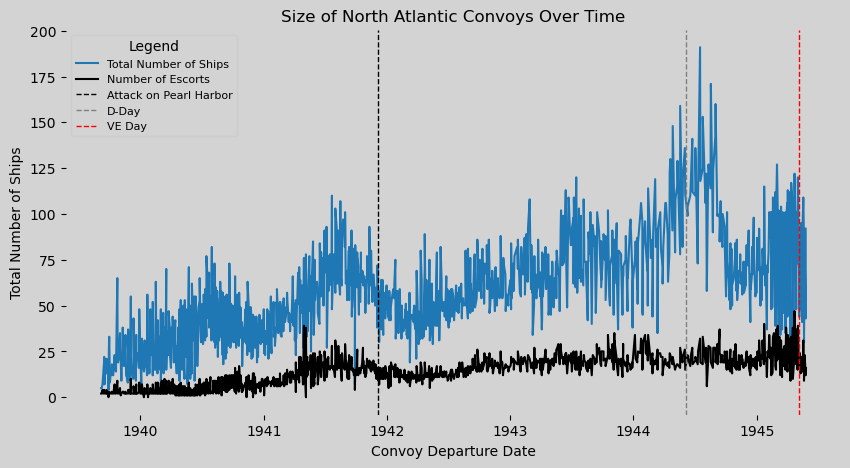

In [47]:
fig, ax = plt.subplots(figsize=(10, 5), facecolor='lightgrey')
ax.plot(df['Depart_Date'], df['Number of Ships'], label='Total Number of Ships')
ax.plot(df['Depart_Date'], df['Number of Escort Ships'], color='black', label='Number of Escorts')
#ax.plot(df['Depart_Date'], df['Avg Number of U-Boats in Atlantic'], color='brown', label='Avg Num of U-Boats in North Atlantic')
ax.set_xlabel('Convoy Departure Date')
ax.set_ylabel('Total Number of Ships')
ax.set_facecolor('lightgrey')
US_War = pd.to_datetime('1941-12-07')
D_Day = pd.to_datetime('1944-06-06')
VE_Day = pd.to_datetime('1945-05-05')
plt.axvline(x=US_War, color='black', linestyle='--', linewidth=1, label='Attack on Pearl Harbor')
plt.axvline(x=D_Day, color='grey', linestyle='--', linewidth=1, label='D-Day')
plt.axvline(x=VE_Day, color='red', linestyle='--', linewidth=1, label='VE Day')
plt.title('Size of North Atlantic Convoys Over Time')
plt.legend(title='Legend', facecolor='lightgrey', loc='upper left', markerscale=.5, fontsize=8)
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.show()

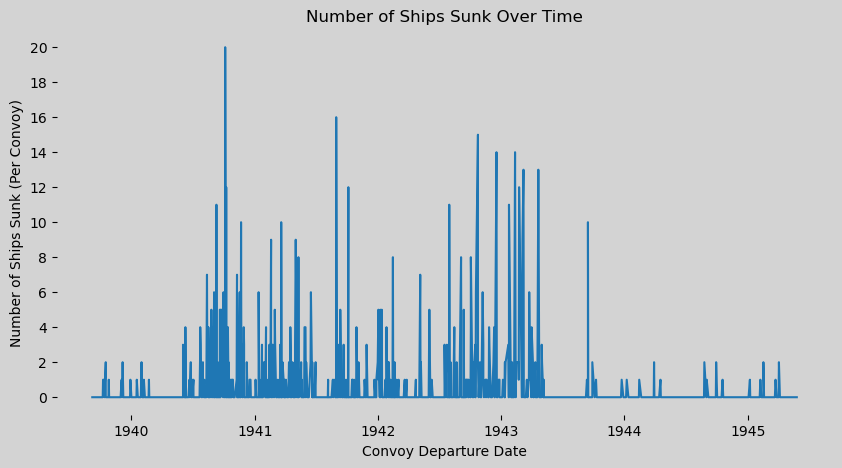

In [13]:
fig, ax = plt.subplots(figsize=(10, 5), facecolor='lightgrey')
ax.plot(df['Depart_Date'], df['Number of Ships Sunk'], label='Number of Ships Sunk')
ax.set_xlabel('Convoy Departure Date')
ax.set_ylabel('Number of Ships Sunk (Per Convoy)')
ax.set_title('Number of Ships Sunk Over Time')
ax.set_facecolor('lightgrey')
plt.yticks(np.arange(0, 22, 2))
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.show()

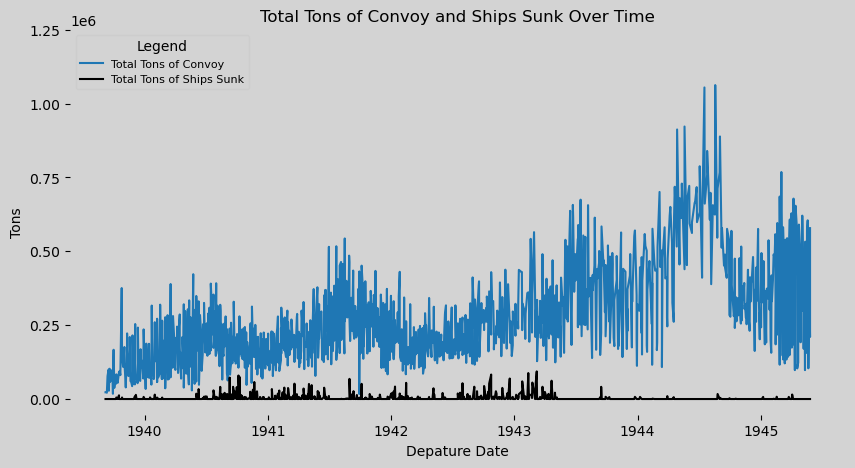

In [19]:
fig, ax = plt.subplots(figsize=(10, 5), facecolor='lightgrey')
ax.plot(df['Depart_Date'], df['Total Tons of Convoy'], label='Total Tons of Convoy')
ax.plot(df['Depart_Date'], df['Total Tons of Ships Sunk'], label='Total Tons of Ships Sunk', color='00000')
ax.set_title('Total Tons of Convoy and Ships Sunk Over Time')
ax.set_ylabel('Tons')
ax.set_xlabel('Depature Date')
ax.set_facecolor('lightgrey')
plt.yticks(np.arange(0, 1500000, 250000))
plt.legend(title='Legend', facecolor='lightgrey', loc='upper left', markerscale=.5, fontsize=8)
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.show()

In [51]:
#Subset Data by Years
years = df['Year'].unique()
ships_sunk_by_year = []
tons_sunk_by_year = []
for year in years:
    if pd.isna(year):
        continue
    year_df = df[df['Year'] == year]
    total_ships_sunk = year_df['Number of Ships Sunk'].sum()
    total_tons_sunk = year_df['Total Tons of Ships Sunk'].sum()
    ships_sunk_by_year.append((year, total_ships_sunk))
    tons_sunk_by_year.append((year, total_tons_sunk))
df_ships_sunk_by_year =  pd.DataFrame(ships_sunk_by_year, columns=('Year', 'Total Ships Sunk'))
df_tons_sunk_by_year =  pd.DataFrame(tons_sunk_by_year, columns=('Year', 'Total Tons Sunk'))

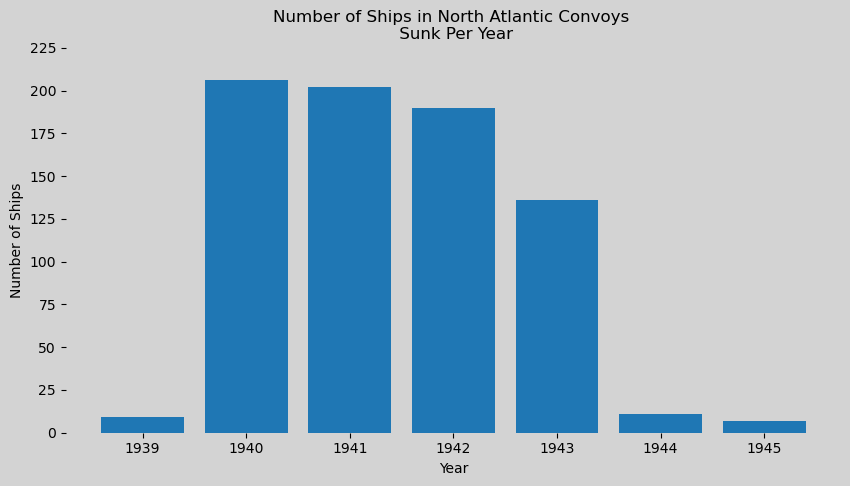

In [36]:
fig, ax = plt.subplots(figsize=(10, 5), facecolor='lightgrey')
ax.bar(df_ships_sunk_by_year['Year'], df_ships_sunk_by_year['Total Ships Sunk'])
ax.set_title('Number of Ships in North Atlantic Convoys \n Sunk Per Year')
ax.set_ylabel('Number of Ships')
ax.set_xlabel('Year')
plt.yticks(np.arange(0, 250, 25))
ax.set_facecolor('lightgrey')
for spine in plt.gca().spines.values():
    spine.set_visible(False)

In [56]:
#Subset Data by Months  (Broken)
months = df['Month'].unique()
ships_sunk_by_month = []
avg_num_uboats = []
avg_size_of_convoy_by_month = []
for month in months:
    if pd.isna(month):
        continue
    month_df = df[df['Month']== month]
    total_ships_sunk_2 = month_df['Number of Ships Sunk'].sum()
    total_u_boats = month_df['Avg Number of U-Boats in Atlantic'].mean()
    convoy_size = month_df['Number of Ships'].mean()
    ships_sunk_by_month.append((month, total_ships_sunk_2))
    avg_num_uboats.append((month, total_u_boats))
    avg_size_of_convoy_by_month.append((month, convoy_size))
df_ships_sunk_by_month = pd.DataFrame(ships_sunk_by_month, columns=('Month', 'Total Ships Sunk'))
df_avg_num_uboats = pd.DataFrame(avg_num_uboats, columns=('Month', 'Avg U-Boats at Sea'))
df_avg_size_of_convoy_by_month = pd.DataFrame(avg_size_of_convoy_by_month, columns=('Month', 'Avg Size of Convoy (Ships)'))
df_ships_sunk_by_month

,Month,Total Ships Sunk
0,9.0,97.0
1,10.0,115.0
2,11.0,66.0
3,12.0,38.0
4,1.0,68.0
5,2.0,90.0
6,3.0,66.0
7,4.0,45.0
8,5.0,53.0
9,6.0,32.0


<BarContainer object of 12 artists>

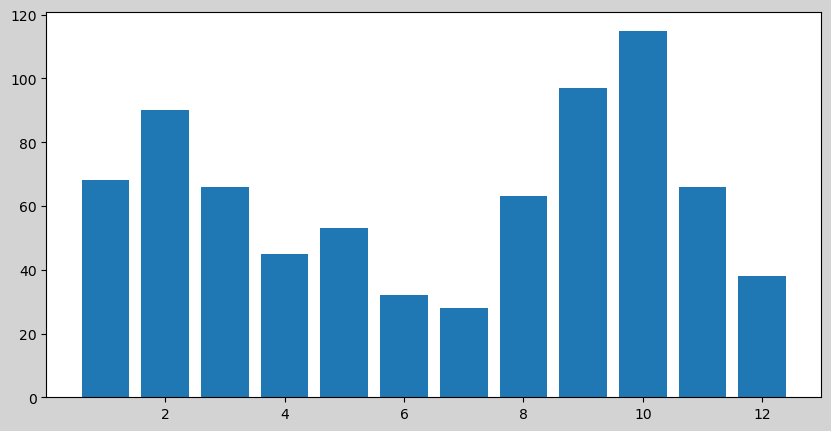

In [55]:
fig, ax = plt.subplots(figsize=(10, 5), facecolor='lightgrey')
ax.bar(df_ships_sunk_by_month['Month'], df_ships_sunk_by_month['Total Ships Sunk'])